# Simulating soccer matches

In this notebook, you will near to simulate soccer matches using the Poisson distribution. This is a very simple, model but shows how simple generative models can simulate real word situations.

## Imports

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

## Model

Here is the basic model we are going to work with:

* There are two teams (1 and 2) that are going to meet in the finals of the world cup.
* All we know about those teams is the average number of goals that have scored in each past game.
* You are going to model the number of goals they score per game using a Poisson distribution.
* By drawing samples from the appropriate Poisson distribution for each team, you will simulate the point spread.
* Using the point spread, you will calculate the probability of each team winning or a tie.

Here are the parameters of the model:

In [2]:
t1_avg = 3 # team 1 average goals per game
t2_avg = 2 # team 2 average goals per game
n = 500    # number of simulated games

Simulate `n` games for each team using a Poisson distribution $Pois(\lambda)$ with $\lambda$ chosen appropriately for the team. Store the number of goals for each team in a NumPy array named `sim1` and `sim2`:

In [3]:
sim1 = np.random.poisson(t1_avg, n)
sim2 = np.random.poisson(t2_avg, n)

In [4]:
assert len(sim1)==n
assert len(sim2)==n
assert sim1.dtype==np.dtype(int)
assert sim2.dtype==np.dtype(int)
assert abs(sim1.mean()-t1_avg)<0.1
assert abs(sim2.mean()-t2_avg)<0.1

Calculate an array of point spreads ($Team_2-Team_1$) for the `n` games. Save your array as the variable `spread`.

In [5]:
spread = sim2 - sim1

In [6]:
assert len(spread)==n
assert spread.dtype==np.dtype(int)

Visualize the point spread by making a `distplot` using Seaborn. Label your axes.

mean = -1.03 vera = 5.2851


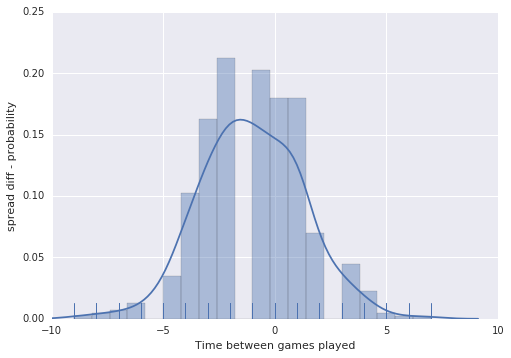

In [14]:
sns.distplot(spread, bins=20, rug=True)
plt.xlim(-10,10)
print("mean =", spread.mean(), "vera =", spread.var())
plt.ylabel('spread diff - probability')
plt.xlabel('Time between games played')

Use the array of simulated point spreads to calculate the probabilities that each team will win or reach a tie. Print these probabilities, along with the team numbers.

In [8]:
def probability(lamb, occurances):
    prob = lamb**occurances
    prob *= np.exp(-lamb)
    fac =1
    for i in range(1, occurances + 1):
        fac *= i
        
    return prob/fac


In [10]:
team1 = 0
team2 = 0
tie = 0
for index,ele in enumerate(spread):
    if ele == 0:
        tie += 1
    elif ele < 0:
        team1 += 1
    else:
        team2 += 1
        
print('Probability of team2 winning: ', team2/len(spread))
print('Probability of team1 winning:', team1/len(spread))
print('Probability of tie:', tie/len(spread))

Probability of team2 winning:  0.262
Probability of team1 winning: 0.594
Probability of tie: 0.144
